In [3]:
#Possible areas to examine

'''
- Types and frequency of tickets
- Seasonality of types of tickets
- Append weather data and evaluate trends
- Append population and evaluate trends

'''

'\n- Types and frequency of tickets\n- Seasonality of types of tickets\n- Append weather data and evaluate trends\n- Append population and evaluate trends\n\n'

In [4]:
# Project Requirements:

'''
- A working notebook.
    - Do not include test, practice, or broken code.
- Functional and documented data importation.
- Comments for all of your code.
    -In the comments, describe any assumptions made.
- Show conclusions with images and explainers in markdown cells.
- Data saved to files within the project file structure.

'''

'\n- A working notebook.\n    - Do not include test, practice, or broken code.\n- Functional and documented data importation.\n- Comments for all of your code.\n    -In the comments, describe any assumptions made.\n- Show conclusions with images and explainers in markdown cells.\n- Data saved to files within the project file structure.\n\n'

In [5]:
import requests
import pandas as pd

# Unit 1 Project- Buffalo 311 Open Data Analysis
Using the 311 Service Requests data, we are going to analyze ticket, weather and population trends.

Diving into the 311 Service Requests...

In [6]:
# Data Importation: Accessing the dataset via SODA API
uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'
r = requests.get(uri)
print('Status code ', r.status_code)
print('Number of rows returned ', len(r.json()))
print('Encoded URI with params ' , r.url)

Status code  200
Number of rows returned  1000
Encoded URI with params  https://data.buffalony.gov/resource/whkc-e5vr.json


In [7]:
df=pd.DataFrame(r.json())
print(df.shape)
df.head()

(1000, 48)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_eziv_p4ck,:@computed_region_jdfw_hhbp,:@computed_region_urdz_b6n8,:@computed_region_vsen_jbmg,:@computed_region_nmyf_6jtp,:@computed_region_ff6v_jbaa,:@computed_region_gkva_sjqs,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,72,18,1,2,26,88,277,10,NaN,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,66,2,11,1,24,70,266,2,NaN,NaN
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,60,8,10,1,35,47,50,4,Peckham St,NaN
3,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,20,15,9,5,8,84,5,4,NaN,NaN
4,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,59,7,6,4,21,11,283,8,NaN,3


# Adding columns to the dataset


In [8]:
# adding time columns to the dataset

# ticket open
df['Year'] = pd.DatetimeIndex(df['open_date']).year # Year column
df['Month (Open)'] = pd.DatetimeIndex(df['open_date']).month # Month column
df['Day(Open)'] = pd.DatetimeIndex(df['open_date']).day # Day column

#ticket close
df['Year'] = pd.DatetimeIndex(df['closed_date']).year # Year column
df['Month (Closed)'] = pd.DatetimeIndex(df['closed_date']).month # Month column
df['Day(Closed)'] = pd.DatetimeIndex(df['closed_date']).day # Day column

# This column lists the duration of each ticket by Days
df['Ticket Duration'] = df['Day(Closed)'] - df['Day(Open)']

# Season the ticket was placed in
Winter = [12,1,2]
Spring = [3,4,5]
Summer = [6,7,8]
Autumn = [9,10,11]

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df['Season'] = df['Month (Open)'].apply(lambda x: season_dict[x])

df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_number,address_line_1,...,:@computed_region_h7a8_iwt4,address_line_2,:@computed_region_k9un_h6vm,Year,Month (Open),Day(Open),Month (Closed),Day(Closed),Ticket Duration,Season
0,509589-1001799765,2023-02-12T12:00:00.000,2023-02-25T10:39:00.000,Closed,DPIS,Housing,Open311 Housing,Property,86,AUSTIN,...,10,NaN,NaN,2023.0,2,12,2.0,25.0,13.0,Winter
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,1358,BROADWAY,...,2,NaN,NaN,2023.0,2,7,2.0,14.0,7.0,Winter
2,1001760699,2023-01-03T12:06:00.000,2023-01-26T12:56:00.000,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,INTERSECTION,Madison St,...,4,Peckham St,NaN,2023.0,1,3,1.0,26.0,23.0,Winter
3,506083-1001764175,2023-01-12T13:30:00.000,2023-01-17T08:08:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,201,BROADWAY,...,4,NaN,NaN,2023.0,1,12,1.0,17.0,5.0,Winter
4,1001787887,2023-02-02T10:53:00.000,2023-02-22T08:27:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,464,FERRY EAST,...,8,NaN,3,2023.0,2,2,2.0,22.0,20.0,Winter


# Frequency Charts

In [9]:
# Types and frequency of ticket types

print(df['reason'].value_counts())


Sanitation                                 278
Streets                                    148
Housing                                    123
Forestry                                    65
Police                                      58
Parking Violations Bureau                   56
Animal Shelter                              50
Engineering - Street Repairs                46
Rodent_Pest Control                         44
Engineering - Traffic                       28
BMHA                                        23
Freedom of Information                      20
National Grid                               20
Buffalo Sewer Authority                     13
Buffalo Water Authority                      7
Streets/Sanitation                           6
Moving Violations                            6
Citizen Services - Quick Response Teams      2
Administration                               2
OSP                                          1
Citizen Services - Graffiti                  1
Taxation     

In [10]:
# Frequency of Tickets during seasons

print(df['Season'].value_counts())

Winter    957
Fall       41
Spring      1
Summer      1
Name: Season, dtype: int64


# Reason Frequency Visualization

In [18]:
# Sanitation is the leading 'reason' for tickets followed by Streets & Housing

<AxesSubplot:>

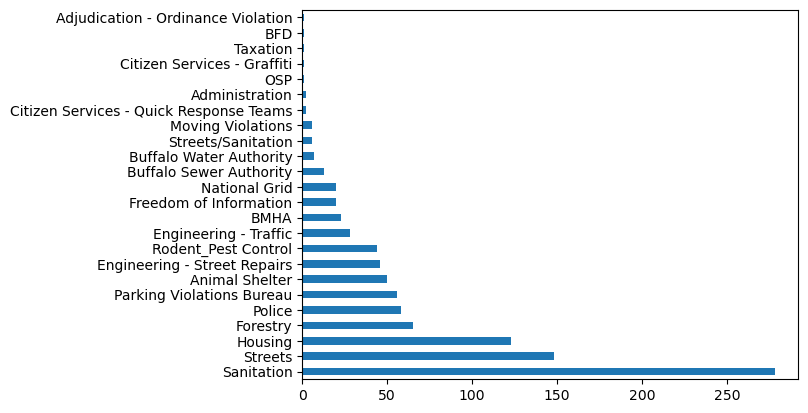

In [17]:
#bar chart
df['reason'].value_counts()[:30].plot(kind='barh')

# Season Ticket Frequency Visualization

Judging by the frequency of tickets on a seasonal basis, majority of them occur during winter.

<AxesSubplot:>

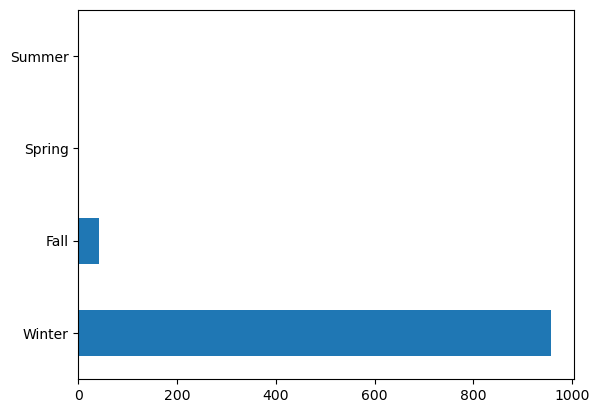

In [12]:
#bar chart
df['Season'].value_counts()[:30].plot(kind='barh')

# Status Visualization

Text(0.5, 1.0, 'Ratio of Open & Closed Tickets')

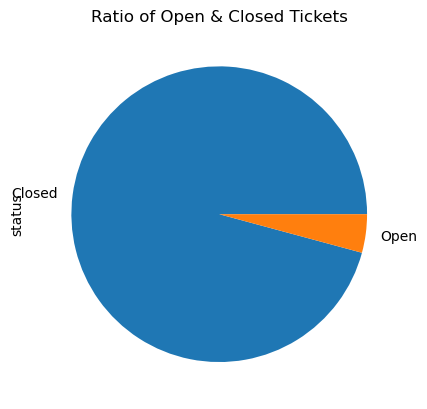

In [13]:
# Pie chart showing the ratio of closed tickets vs open
pieChart = df['status'].value_counts()[:2].plot(kind='pie')
pieChart.set_title("Ratio of Open & Closed Tickets")

In [14]:
#percentage of closed and open

closedSum = (df['status'] =='Closed').sum()
print('Number of Closed Tickets: ',closedSum,)
openSum = (df['status'] =='Open').sum()
print('Number of Open Tickets: ',openSum)

closedSumPercent = (closedSum/(closedSum+openSum))*100
print('Percentage of Closed Tickets: ',closedSumPercent,"%")

openSumPercent = (openSum/(closedSum+openSum))*100
print('Percentage of Open Tickets:',openSumPercent,'%')


#get the time span (year will be fine)
print('Start of data set: ',df['Year'].min()) # this is when the 311 data starts
print('End of data set: ',df['Year'].max()) # this is when the 311 data ends

timeFrame = df['Year'].max() - df['Year'].min() # of Years the data spans
print(timeFrame,'year timeframe')

Number of Closed Tickets:  958
Number of Open Tickets:  42
Percentage of Closed Tickets:  95.8 %
Percentage of Open Tickets: 4.2 %
Start of data set:  2016.0
End of data set:  2023.0
7.0 year timeframe


In [16]:
print('Within a',timeFrame,'yr timeframe, ',closedSumPercent,'% of tickets were complete.')

Within a 7.0 yr timeframe,  95.8 % of tickets were complete.
